In [28]:
import numpy as np
import pandas as pd
from datascience import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

In [7]:
pbooks = pd.read_csv('bestsellers with categories.csv')
pbooks

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [10]:
pbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [8]:
pbooks.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
pbooks['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

In [12]:
pbooks['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

In [13]:
top_rated = pbooks.groupby(['Name', 'Author', 'Genre'], as_index=False)[['User Rating', 'Reviews']].mean()
top_rated = top_rated[top_rated['Reviews']>5000]
top_rated = top_rated.sort_values('User Rating', ascending=False).head(20)
top_rated

,Name,Author,Genre,User Rating,Reviews
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,4.9,5867.0
330,Unfreedom of the Press,Mark R. Levin,Non Fiction,4.9,5956.0
312,The Wonderful Things You Will Be,Emily Winfield Martin,Fiction,4.9,8842.0
68,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,Fiction,4.9,7235.0
69,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,12619.0
70,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,Fiction,4.9,9089.0
71,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,Fiction,4.9,5470.0
208,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.9,9382.0
66,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,Fiction,4.9,5062.0
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0


In [14]:
# Weighted rating
m = min(pbooks['Reviews'])
C = df['User Rating'].mean()
def weighted_rating(x, m=m, C=C):
    v = x['Reviews']
    R = x['User Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [15]:
pbooks['Weighted Rating'] = pbooks.apply(weighted_rating, axis=1)

In [17]:
pbooks.groupby(['Name','Author','Genre'], as_index=False)[['User Rating', 'Reviews', 'Weighted Rating']].mean().sort_values(by='Weighted Rating', ascending=False).head(10)

,Name,Author,Genre,User Rating,Reviews,Weighted Rating
178,"Oh, the Places You'll Go!",Dr. Seuss,Fiction,4.9,21834.0,4.899524
116,Harry Potter and the Chamber of Secrets: The I...,J.K. Rowling,Fiction,4.9,19622.0,4.899470
140,Jesus Calling: Enjoying Peace in His Presence ...,Sarah Young,Non Fiction,4.9,19576.0,4.899469
310,The Very Hungry Caterpillar,Eric Carle,Fiction,4.9,19546.0,4.899468
36,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,Fiction,4.9,14344.0,4.899275
69,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,Fiction,4.9,12619.0,4.899177
151,Last Week Tonight with John Oliver Presents A ...,Jill Twiss,Fiction,4.9,11881.0,4.899126
120,Harry Potter and the Sorcerer's Stone: The Ill...,J.K. Rowling,Fiction,4.9,10052.0,4.898967
349,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Fiction,4.9,9413.0,4.898897
208,Strange Planet (Strange Planet Series),Nathan W. Pyle,Fiction,4.9,9382.0,4.898894


In [18]:
pbooks.groupby(['Genre'])['Weighted Rating'].mean()

Genre
Fiction        4.648178
Non Fiction    4.595980
Name: Weighted Rating, dtype: float64

In [19]:
pbooks.groupby(['Name', 'Author', 'Genre'], as_index=False)['Price'].mean().sort_values('Price', ascending=False).head(10)

,Name,Author,Genre,Price
56,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,Non Fiction,105.0
307,The Twilight Saga Collection,Stephenie Meyer,Fiction,82.0
112,Hamilton: The Revolution,Lin-Manuel Miranda,Non Fiction,54.0
228,The Book of Basketball: The NBA According to T...,Bill Simmons,Non Fiction,53.0
115,Harry Potter Paperback Box Set (Books 1-7),J. K. Rowling,Fiction,52.0
191,Publication Manual of the American Psychologic...,American Psychological Association,Non Fiction,46.0
333,Watchmen,Alan Moore,Fiction,42.0
281,The Official SAT Study Guide,The College Board,Non Fiction,40.0
220,The Alchemist,Paulo Coelho,Fiction,39.0
282,"The Official SAT Study Guide, 2016 Edition (Of...",The College Board,Non Fiction,36.0


In [20]:
pbooks.groupby(['Genre'], as_index=False)['Price'].mean()

,Genre,Price
0,Fiction,10.850000
1,Non Fiction,14.841935


In [22]:
# Most Reviewed
pbooks.groupby(['Author','Name', 'Genre'],as_index=False)[['Weighted Rating', 'Reviews']].mean().sort_values('Reviews', ascending=False).head(10)

,Author,Name,Genre,Weighted Rating,Reviews
87,Delia Owens,Where the Crawdads Sing,Fiction,4.799924,87841.0
243,Paula Hawkins,The Girl on the Train,Fiction,4.100241,79446.0
231,Michelle Obama,Becoming,Non Fiction,4.799890,61133.0
128,Gillian Flynn,Gone Girl,Fiction,4.000399,57271.0
182,John Green,The Fault in Our Stars,Fiction,4.699940,50482.0
200,Kristin Hannah,The Nightingale: A Novel,Fiction,4.799864,49288.0
100,E L James,Fifty Shades of Grey: Book One of the Fifty Sh...,Fiction,3.800640,47265.0
15,Andy Weir,The Martian,Fiction,4.699924,39459.0
21,Anthony Doerr,All the Light We Cannot See,Fiction,4.600019,36348.0
245,Paulo Coelho,The Alchemist,Fiction,4.699916,35799.0


In [23]:
pbooks.groupby(['Genre'])['Reviews'].mean()

Genre
Fiction        15683.791667
Non Fiction     9065.145161
Name: Reviews, dtype: float64

In [24]:
pbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             550 non-null    object 
 1   Author           550 non-null    object 
 2   User Rating      550 non-null    float64
 3   Reviews          550 non-null    int64  
 4   Price            550 non-null    int64  
 5   Year             550 non-null    int64  
 6   Genre            550 non-null    object 
 7   Weighted Rating  550 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 34.5+ KB


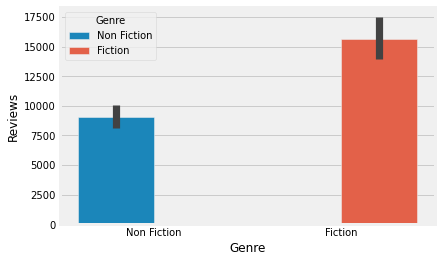

In [29]:
sns.barplot(x = 'Genre', y = 'Reviews' , hue = 'Genre', data = pbooks)

<ipython-input-25-6d5f8bb4a02c>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


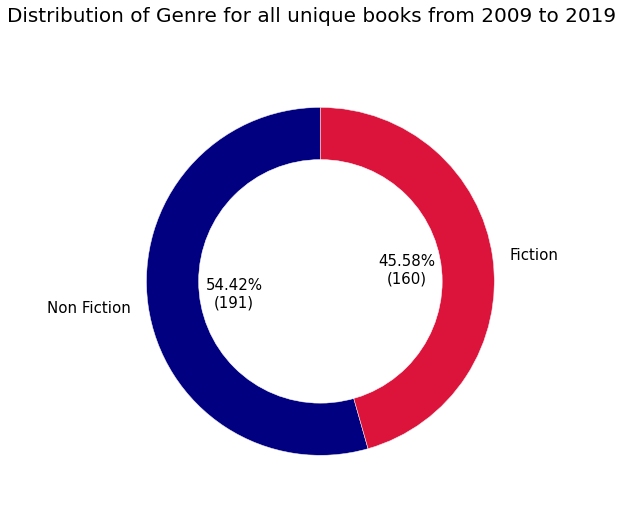

In [25]:
no_dup = pbooks.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plots.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']

center_circle = plots.Circle((0, 0), 0.7, color='white')
plots.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
fig.show()

<ipython-input-26-26a2f1259c6f>:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


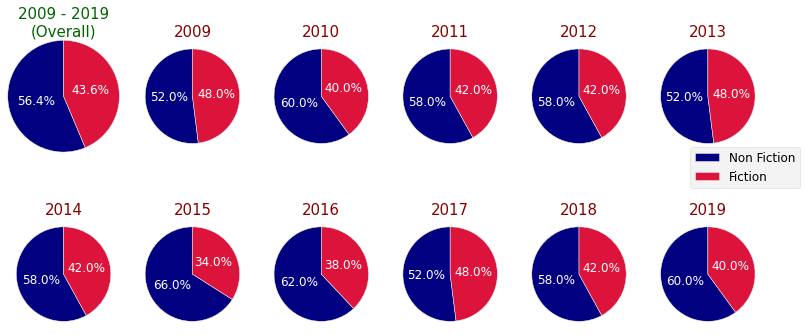

In [26]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = pbooks['Genre'].value_counts()

fig, ax = plots.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = pbooks[pbooks['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = pbooks[pbooks['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

#plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             #fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
fig.show()

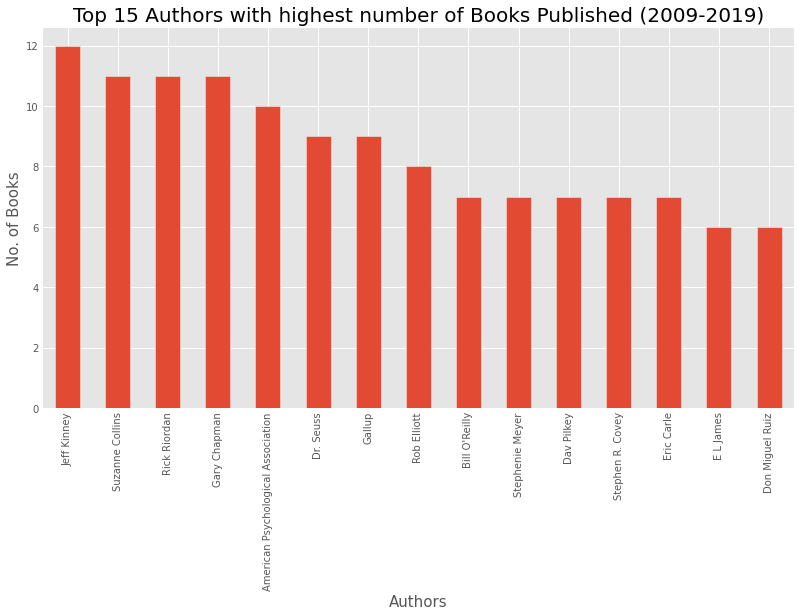

In [30]:
plots.style.use("ggplot")
plots.rcParams["figure.figsize" ]= (12,7)
#color = plt.cm.hsv(np.linspace(0,1,15))
pbooks["Author"].value_counts().sort_values(ascending=False).head(15).plot.bar()#color=color
plots.title("Top 15 Authors with highest number of Books Published (2009-2019)",fontsize=20)
plots.xlabel("Authors",fontsize=15)
plots.ylabel("No. of Books",fontsize=15)
plots.show()

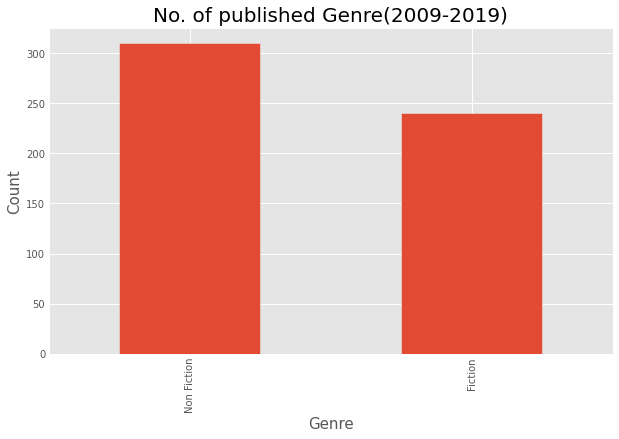

In [31]:
plots.style.use("ggplot")
plots.rcParams["figure.figsize" ]= (9,6)
#color = ["purple","yellowgreen"]#plt.cm.BuPu(np.linspace(0,1,15))
pbooks["Genre"].value_counts().sort_values(ascending=False).head(15).plot.bar()#color=color
plots.title("No. of published Genre(2009-2019)",fontsize=20)
plots.xlabel("Genre",fontsize=15)
plots.ylabel("Count",fontsize=15)
plots.show()

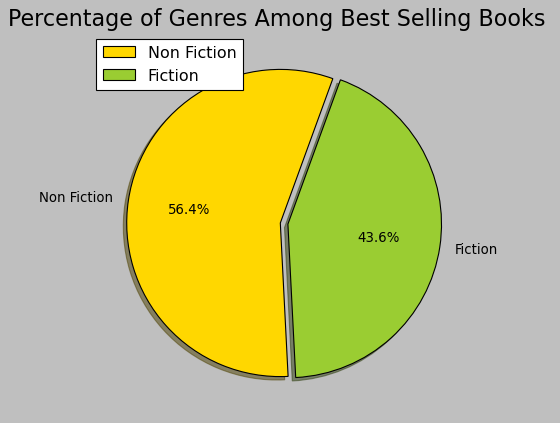

In [32]:
plots.rcParams["figure.figsize"]= (10,8)
plots.style.use("classic")
color = ["Gold","yellowgreen"]
labels = ["Non Fiction","Fiction"]
pbooks["Genre"].value_counts().plot.pie(y = "Genre",startangle = 70,explode = (0,0.05),shadow=True,colors = color,autopct="%0.1f%%")
plots.title("Percentage of Genres Among Best Selling Books ",fontsize=20)
plots.legend(labels,loc="best")
plots.axis("off")
plots.show()

In [37]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_fic= []
for i in year:
    fic = pbooks[(pbooks["Year"] == i) & (pbooks["Genre"] == "Fiction")]
    num_fic.append(len(fic))
pbooks_fict = pd.DataFrame({"Year": year,"numberofFiction": num_fic})
pbooks_fict.head()

,Year,numberofFiction
0,2009,24
1,2010,20
2,2011,21
3,2012,21
4,2013,24


In [38]:
year = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
num_nonfic= []
for i in year:
    nonfic = pbooks[(pbooks["Year"] == i) & (pbooks["Genre"] == "Non Fiction")]
    num_nonfic.append(len(nonfic))
pbooks_nonfict = pd.DataFrame({"Year": year,"numberofNonFiction": num_nonfic})
pbooks_nonfict.head()

,Year,numberofNonFiction
0,2009,26
1,2010,30
2,2011,29
3,2012,29
4,2013,26


In [39]:
pbooks_nonfict["numberofFiction"] = pbooks_fict["numberofFiction"]
pbooks_nonfict.head()

,Year,numberofNonFiction,numberofFiction
0,2009,26,24
1,2010,30,20
2,2011,29,21
3,2012,29,21
4,2013,26,24


In [41]:
pbooks_genre = pbooks_nonfict.copy()
pbooks_genre.head()

,Year,numberofNonFiction,numberofFiction
0,2009,26,24
1,2010,30,20
2,2011,29,21
3,2012,29,21
4,2013,26,24


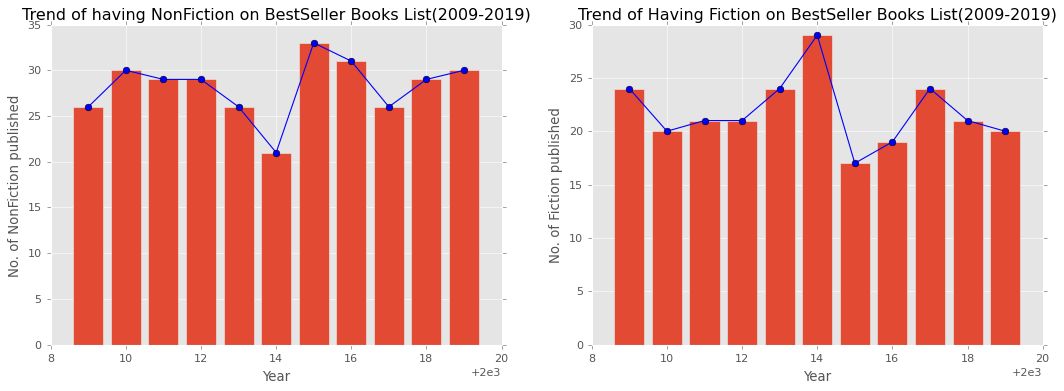

In [42]:
plots.style.use("ggplot")
plots.figure(figsize=(16,5))
plots.subplot(1,2,1)
plots.bar(x = pbooks_genre["Year"],height=pbooks_genre["numberofNonFiction"],)
plots.plot(pbooks_genre["Year"],pbooks_genre["numberofNonFiction"],"bo-")

plots.title("Trend of having NonFiction on BestSeller Books List(2009-2019)")
plots.xlabel("Year")
plots.ylabel("No. of NonFiction published")

plots.subplot(1,2,2)
plots.bar(x = pbooks_genre["Year"],height=pbooks_genre["numberofFiction"],)
plots.plot(pbooks_genre["Year"],pbooks_genre["numberofFiction"],"bo-")
plots.title("Trend of Having Fiction on BestSeller Books List(2009-2019)")
plots.xlabel("Year")
plots.ylabel("No. of Fiction published")
plots.show()

In [44]:
books_tbl = Table.from_df(pbooks)
books_tbl

Name,Author,User Rating,Reviews,Price,Year,Genre,Weighted Rating
10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,4.69983
11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,4.60033
12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,4.69984
1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,4.69986
"5,000 Awesome Facts (About Everything!) (National Geogra ...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,4.79913
A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,4.40064
A Game of Thrones / A Clash of Kings / A Storm of Swords ...,George R. R. Martin,4.7,19735,30,2014,Fiction,4.69985
A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,4.69985
"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,4.6995
A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,4.60003


In [45]:
genre_table = Table().with_columns('genre',make_array('Fiction','Non Fiction'),'genre class',make_array(0,1))
genre_table

genre,genre class
Fiction,0
Non Fiction,1


In [49]:
authorprice = pd.DataFrame([],columns=['Author','Mean Price'])
authors = pbooks['Author'].unique()
for index, author in enumerate(authors):
    authordata = pbooks[pbooks['Author']==author]
    meanprice = authordata['Price'].mean()
    authorprice.loc[index] = [author,meanprice]
authorprice =  authorprice.sort_values('Mean Price', ascending=False).iloc[:10,:]
authorprice

,Author,Mean Price
49,American Psychiatric Association,105.000000
83,Lin-Manuel Miranda,54.000000
168,Bill Simmons,53.000000
139,American Psychological Association,46.000000
232,Alan Moore,42.000000
203,The College Board,39.333333
162,Paulo Coelho,39.000000
85,J. K. Rowling,35.000000
10,Jaycee Dugard,32.000000
36,Thomas Piketty,28.000000


Text(0.5, 1.0, 'Authors with Books of Maximum Price')

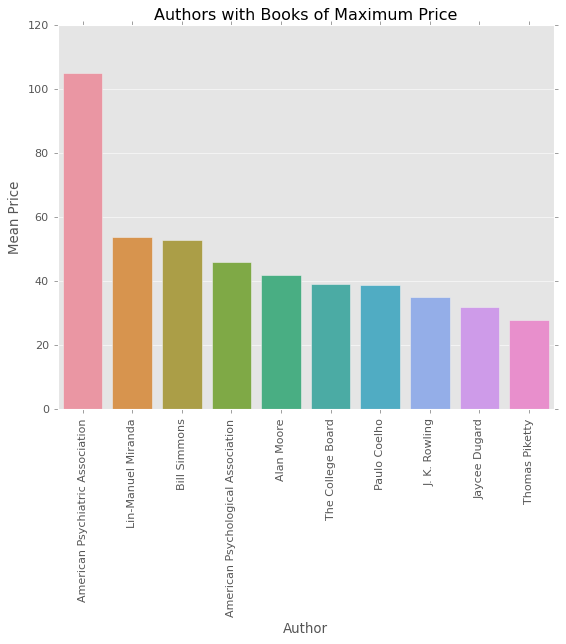

In [57]:
sns.barplot(x ='Author', y ='Mean Price', data = authorprice)
plots.xticks(rotation=90)
plots.title('Authors with Books of Maximum Price')

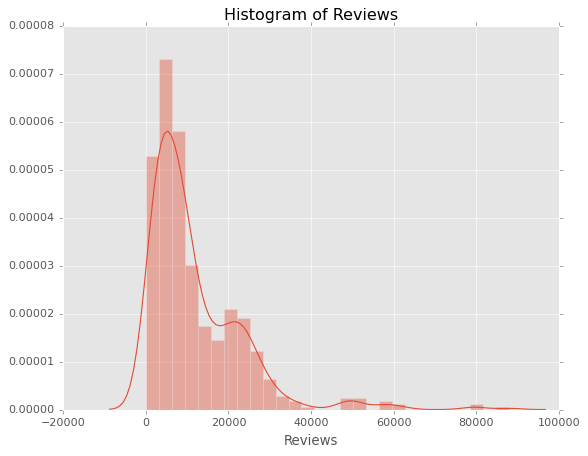

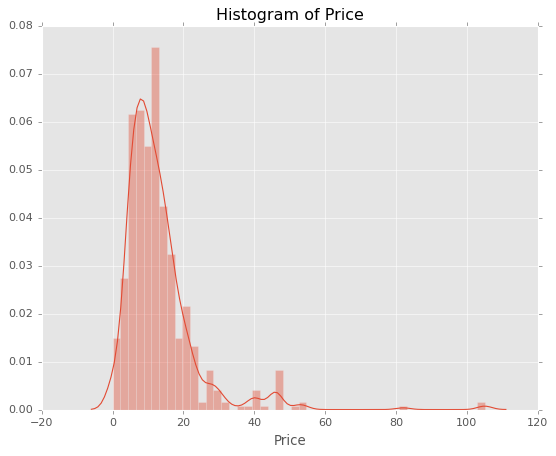

In [55]:
for feature in ['Reviews','Price']:
    sns.distplot(pbooks[feature])
    plots.title('Histogram of {}'.format(feature))
    plots.show()

In [60]:
linear_reg_y = pbooks[['User Rating']]
linear_reg_y

,User Rating
0,4.7
1,4.6
2,4.7
3,4.7
4,4.8
...,...
545,4.9
546,4.7
547,4.7
548,4.7


In [61]:
linear_reg_x = pbooks.iloc[:,5:]
linear_reg_x

,Year,Genre,Weighted Rating
0,2016,Non Fiction,4.699826
1,2011,Fiction,4.600325
2,2018,Non Fiction,4.699841
3,2017,Fiction,4.699859
4,2019,Non Fiction,4.799127
...,...,...,...
545,2019,Fiction,4.898897
546,2016,Non Fiction,4.699790
547,2017,Non Fiction,4.699790
548,2018,Non Fiction,4.699790


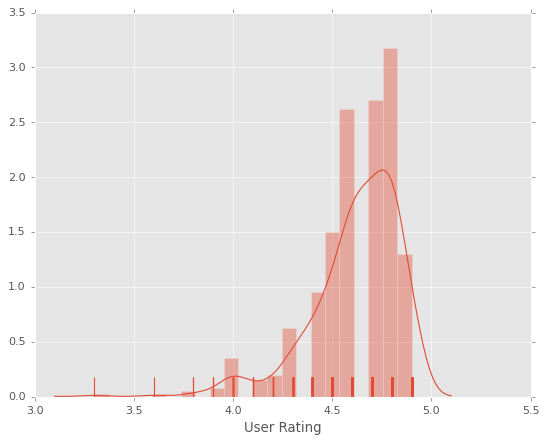

In [62]:
sns.distplot(linear_reg_y['User Rating'], rug=True)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [64]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
linear_reg_x_train, linear_reg_x_test, linear_reg_y_train, linear_reg_y_test = train_test_split(linear_reg_x,linear_reg_y,test_size = 0.35)
linear_model = LinearRegression()
linear_model.fit(linear_reg_X_train,linear_reg_y_train)
linear_pred = linear_model.predict(linear_reg_X_test)

In [ ]:
logis_pred = linear_model.predict(linear_reg_X)
logis_pred